## 1. 옹알이 (1) (성공...?)

머쓱이는 태어난 지 6개월 된 조카를 돌보고 있습니다. 조카는 아직 "aya", "ye", "woo", "ma" 네 가지 발음을 최대 한 번씩 사용해 조합한(이어 붙인) 발음밖에 하지 못합니다. 문자열 배열 babbling이 매개변수로 주어질 때, 머쓱이의 조카가 발음할 수 있는 단어의 개수를 return하도록 solution 함수를 완성해주세요.  

babbling의 각 문자열에서 "aya", "ye", "woo", "ma"는 각각 최대 한 번씩만 등장합니다.  
즉, 각 문자열의 가능한 모든 부분 문자열 중에서 "aya", "ye", "woo", "ma"가 한 번씩만 등장합니다.

In [ ]:
def solution(babbling):
    bab = ["aya", "ye", "woo", "ma"]
    a = []
    for i in range(len(bab)):
        a.append(bab[i])
        for j in range(len(bab)):
            if i == j:
                pass
            else:
                a.append(bab[i] + bab[j])
            for k in range(len(bab)):
                if i == j or i == k or j == k:
                    pass
                else:
                    a.append(bab[i] + bab[j] + bab[k])
                for l in range(len(bab)):
                    if i == j or i == k or i == l or j == k or j == l or k == l:
                        pass
                    else:
                        a.append(bab[i] + bab[j] + bab[k] + bab[l])
    # print(f"len(a): {len(a)},    {a}")
    count = 0
    for i in range(len(babbling)):
        if babbling[i] in a:
            count += 1
    return count
print(solution(["ayaye", "uuuma", "ye", "yemawoo", "ayaa"]))

len(a): 64,    ['aya', 'ayaye', 'ayayewoo', 'ayayewooma', 'ayayema', 'ayayemawoo', 'ayawoo', 'ayawooye', 'ayawooyema', 'ayawooma', 'ayawoomaye', 'ayama', 'ayamaye', 'ayamayewoo', 'ayamawoo', 'ayamawooye', 'ye', 'yeaya', 'yeayawoo', 'yeayawooma', 'yeayama', 'yeayamawoo', 'yewoo', 'yewooaya', 'yewooayama', 'yewooma', 'yewoomaaya', 'yema', 'yemaaya', 'yemaayawoo', 'yemawoo', 'yemawooaya', 'woo', 'wooaya', 'wooayaye', 'wooayayema', 'wooayama', 'wooayamaye', 'wooye', 'wooyeaya', 'wooyeayama', 'wooyema', 'wooyemaaya', 'wooma', 'woomaaya', 'woomaayaye', 'woomaye', 'woomayeaya', 'ma', 'maaya', 'maayaye', 'maayayewoo', 'maayawoo', 'maayawooye', 'maye', 'mayeaya', 'mayeayawoo', 'mayewoo', 'mayewooaya', 'mawoo', 'mawooaya', 'mawooayaye', 'mawooye', 'mawooyeaya']
3


### 1. 옹알이 (1) 다른 풀이

In [53]:
def solution(babbling):
    c = 0
    for b in babbling:
        for w in [ "aya", "ye", "woo", "ma" ]:
            if w in b:
                b = b.replace(w, ' ')
        if len(b.strip()) == 0:
            c += 1
    return c

print(solution(["ayaye", "uuuma", "ye", "yemawoo", "ayaa"]))

3


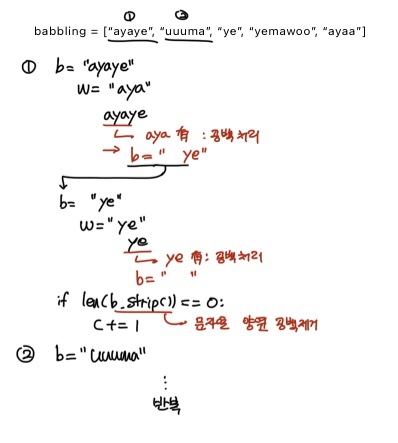

---

## 2. 달리기 경주 (시간초과)

얀에서는 매년 달리기 경주가 열립니다. 해설진들은 선수들이 자기 바로 앞의 선수를 추월할 때 추월한 선수의 이름을 부릅니다. 예를 들어 1등부터 3등까지 "mumu", "soe", "poe" 선수들이 순서대로 달리고 있을 때, 해설진이 "soe"선수를 불렀다면 2등인 "soe" 선수가 1등인 "mumu" 선수를 추월했다는 것입니다. 즉 "soe" 선수가 1등, "mumu" 선수가 2등으로 바뀝니다.  

선수들의 이름이 1등부터 현재 등수 순서대로 담긴 문자열 배열 players와 해설진이 부른 이름을 담은 문자열 배열 callings가 매개변수로 주어질 때, 경주가 끝났을 때 선수들의 이름을 1등부터 등수 순서대로 배열에 담아 return 하는 solution 함수를 완성해주세요.

In [7]:
def solution(players, callings):
    for i in callings:
        n = players.index(i)
        b = players[n]
        players[n] = players[n-1]
        players[n-1] = b
    return players

solution(["mumu", "soe", "poe", "kai", "mine"],
               ["soe","poe","kai","mine","poe", "kai","mine","mumu","kai","mine","mumu","soe","mine","mumu","soe","poe","mumu", "soe", "poe", "kai"\
                ,"soe","poe","poe"])

['poe', 'soe', 'mumu', 'kai', 'mine']

그런데 제출 후 채점을 해보니 시간초과로 실패하는 케이스가 절반정도 생김.  
내생각에는 calling 이 ["kai", "kai", "mine", "mine", "soe", "poe", "soe", "poe"] 이렇게 1등을 제외한 모든 사람을 같은 수만큼 부르면 처음 players와 같은 정답이 나옴.  
calling 이 ["soe","poe","kai","mine","poe", "kai","mine","mumu","kai","mine","mumu","soe","mine","mumu","soe","poe","mumu", "soe", "poe", "kai"] 인 경우 (모든 사람을 똑같은 숫자만큼 불렀을때) 처음 player와 같은 정답이 나옴.
그렇기 때문에 calling을 하나씩 불러서 자리를 바꿀 필요 없이 부른 사람의 숫자를 count해서 마지막에 한꺼번에 연산을 수행하는게 더 효율적이지 않을까?  
=> 숫자를 count하는것도 결국 동일하게 O(nm)이기 때문에 의미 X  

### 핵심 : dictionary를 사용해서 시간복잡도를 줄여보자.

https://mkdiriandev.tistory.com/38

### 1. 문제 풀이 접근
이 문제는 해설진이 부른 선수(callings)가 추월하면서 players 리스트의 순서를 실시간으로 변경해야 함.  

즉, 선수의 현재 등수를 빠르게 찾고, 변경하는 것이 핵심.  

선수들의 순위를 저장할 때 list.index()를 사용하면 시간복잡도가 O(N)으로 비효율적임.  
해설진이 callings를 최대 1,000,000번 부를 수 있기 때문에, O(N) 탐색을 반복하면 최악의 경우 O(N * M) = 50,000 * 1,000,000 = 50,000,000,000(500억 번 연산)이 되어 시간 초과가 발생함.  
따라서, **딕셔너리(해시맵)를 사용**해 선수의 등수를 빠르게 조회하고 갱신하는 것이 중요함.  

### 2. 해결 방법 (시간복잡도 O(M))
✅ 핵심 아이디어  

#### **players 리스트를 기반으로 선수 이름을 key, 등수를 value로 하는 딕셔너리(rank_map)를 생성**  
callings을 순회하며 다음 연산을 수행  
1. 불린 선수의 등수를 rank_map에서 가져옴  
2. 앞 선수와 위치를 바꿈  
3. players 리스트를 업데이트  
4. rank_map을 업데이트 (등수를 빠르게 갱신하기 위해)  

이 방식은 players 리스트를 O(1)로 조회하고, swap 연산을 수행하여 callings의 길이(M)만큼만 반복하면 되므로 O(M) 연산으로 해결할 수 있음.  

### 2.5 기존 풀이의 문제점 (by GPT5)
O(len(players) · len(callings)) time  
O(n*m) 이므로 n^2의 연산이 수행됨. 즉, 플레이어 수(n)가 많고 호출 수(m)도 많으면 성능이 급격히 떨어지는 구조임.


In [2]:
def solution(players, callings):
    # 선수들의 등수를 저장하는 딕셔너리 (key: 선수 이름, value: 현재 등수)
    rank_map = {player: i for i, player in enumerate(players)}

    # callings의 선수들을 순회하며 등수를 변경
    for calling in callings:
        current_rank = rank_map[calling]  # 불린 선수의 현재 등수
        if current_rank == 0:
            continue  # 1등은 호출되지 않으므로 따로 처리할 필요 없음

        # 바로 앞 선수와 자리 변경
        front_player = players[current_rank - 1]
        
        players[current_rank - 1], players[current_rank] = players[current_rank], players[current_rank - 1]

        # 등수 정보 갱신
        rank_map[calling] -= 1
        rank_map[front_player] += 1

    return players

solution(["mumu", "soe", "poe", "kai", "mine"],["kai", "kai", "mine", "mine"])

['mumu', 'kai', 'mine', 'soe', 'poe']

### 4. 코드 해설
`rank_map = {player: i for i, player in enumerate(players)}  `

아래와 동일 
```
rank_map = {}  
for i, player in enumerate(players):  
    rank_map[player] = i
```

ex : {"mumu": 0, "soe": 1, "poe": 2, "kai": 3, "mine": 4}

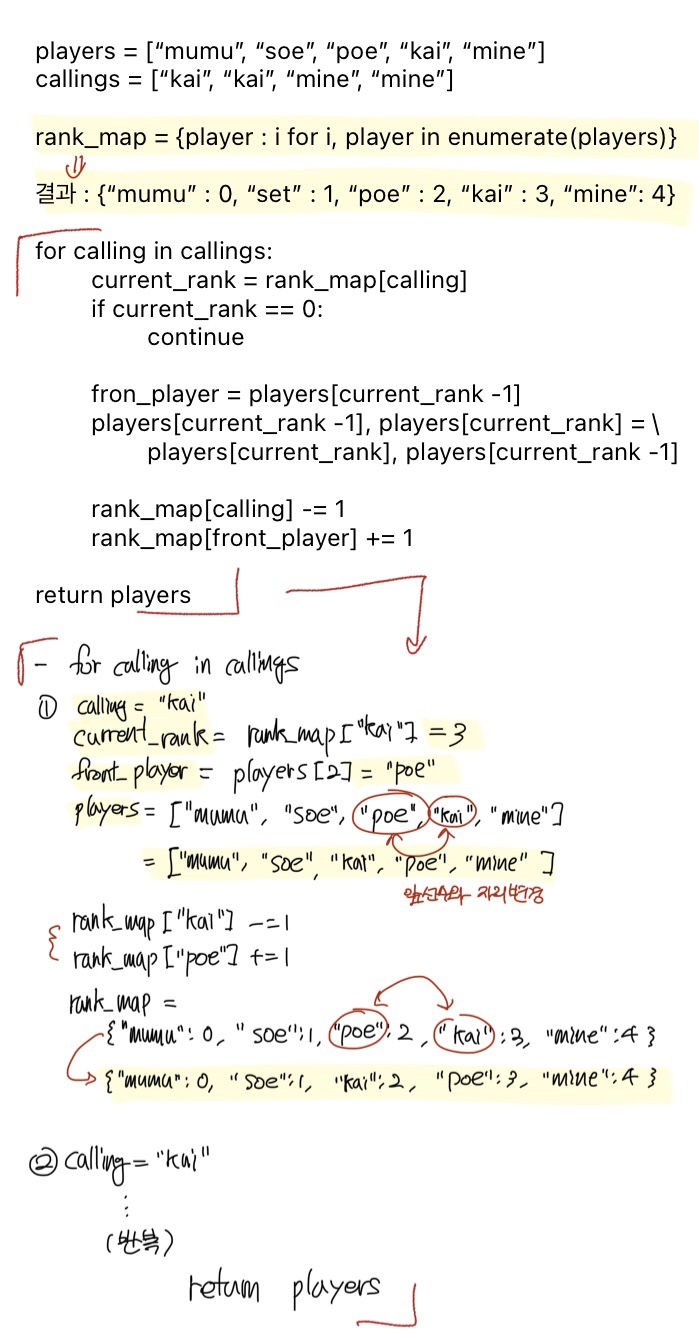

### 5. 시간복잡도 분석
✅ players 리스트 초기화  

rank_map = {player: i for i, player in enumerate(players)} → O(N)  
✅ callings 순회하면서 등수 변경 (M번 반복)  

- rank_map[calling] → O(1)  
- players에서 swap 연산 → O(1)  
- rank_map 갱신 → O(1)  
- 총 O(M) 연산  
따라서 최종 시간복잡도는 O(N) + O(M) ≈ O(M)으로 매우 효율적.  

---

## 3. 피보나치 수(성공)

피보나치 수는 F(0) = 0, F(1) = 1일 때, 1 이상의 n에 대하여 F(n) = F(n-1) + F(n-2) 가 적용되는 수 입니다.  

예를들어  

F(2) = F(0) + F(1) = 0 + 1 = 1  
F(3) = F(1) + F(2) = 1 + 1 = 2  
F(4) = F(2) + F(3) = 1 + 2 = 3  
F(5) = F(3) + F(4) = 2 + 3 = 5  
와 같이 이어집니다.  

2 이상의 n이 입력되었을 때, n번째 피보나치 수를 1234567으로 나눈 나머지를 리턴하는 함수, solution을 완성해 주세요.

In [3]:
def solution(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        k = solution(n-1) + solution(n-2)
        return k % 1234567
    
solution(10)

55

### 🚨이런 문제가 있어요
재귀 호출을 하면 n이 50 이상일 때  

시간 초과가 나거나  
Python이나 JavaScript 등 일부 언어에서는 런타임 에러가 납니다.  
런타임 에러가 나는 이유: 일부 언어는 재귀 호출을 할 수 있는 횟수가 정해져 있고, 횟수를 넘어 재귀 호출을 하면 런타임 에러를 내도록 설계되어 있습니다.  
<br>

#### <피보나치 수열을 재귀함수로 구현했을때 completion time>

T(n)을 피보나치수열의 n번째 숫자를 계산하기 위한 연산 횟수라고 하면  T(0) = 1, T(1) = 1이다. 또한 T(n-1) > T(n-2) 임으로, 2 이상의 n에 대하여 다음이 성립한다.  
T(n) = T(n-1) + T(n-2) + 1 > 2 x T(n-2) > 2^2 x T(n -4).... > 2^n/2 x T(0) = 2^n/2

재귀 호출 수의 규칙(점화식)  
T(0)=1, T(1)=1  

n≥2에서 T(n) = T(n-1) + T(n-2) + 1  
(n번째를 계산하려면 n-1, n-2번째를 또 재귀로 계산하고, +1은 현재 단계의 상수 작업)  

두 단계마다 최소 두 배로 늘어남  

T(n-1) ≥ T(n-2)이고 +1 > 0 이므로  
T(n) = T(n-1) + T(n-2) + 1 ≥ T(n-2) + T(n-2) = 2·T(n-2)  
 
같은 논리로 한 번 더 적용하면  
T(n) ≥ 2·T(n-2) ≥ 2·(2·T(n-4)) = 2^2·T(n-4)  

반복 적용 → 약 n/2번 두 배  

이렇게 2씩 줄여가며 k번 적용하면 T(n) ≥ 2^k · T(n-2k)  

n-2k가 0이나 1(기저)일 때 멈추니, 대략 k ≈ n/2  

따라서 T(n) ≥ 2^{⌊n/2⌋} · T(0 or 1) = Θ(2^{n/2})  
→ 최소한 이 정도로 빠르게(지수적으로) 커짐.

#### 즉 completion time = O(n^2)

In [5]:
# F(n) = F(n-2) + F(n-1)
def solution(n):
    f_n2 = 0
    f_n1 = 1
    for i in range(n+1):
        if i == 0:
            f_n = 0
        if i == 1:
            f_n = 1
        f_n2 = f_n1
        f_n1 = f_n
        f_n = f_n1 + f_n2
        # print(f"i: {i}  f_n1: {f_n1}")
    return f_n1 % 1234567

print(solution(10))

55


for loop 이 한번 돌 때마다 O(1) 연산만 하기 때문에 전체 completion time은 O(n)

---

## 4. 숫자의 표현 (성공)

Finn은 요즘 수학공부에 빠져 있습니다. 수학 공부를 하던 Finn은 자연수 n을 연속한 자연수들로 표현 하는 방법이 여러개라는 사실을 알게 되었습니다. 예를들어 15는 다음과 같이 4가지로 표현 할 수 있습니다.  

1 + 2 + 3 + 4 + 5 = 15  
4 + 5 + 6 = 15  
7 + 8 = 15  
15 = 15  
자연수 n이 매개변수로 주어질 때, 연속된 자연수들로 n을 표현하는 방법의 수를 return하는 solution를 완성해주세요.

In [38]:
def solution(n):
    count = 0
    for i in range(1,n//2+1):
        k = i
        lst = []
        for _ in range(n):
            if sum(lst) > n:
                continue
            else:
                lst.append(k)
                k += 1
                # print(f"k: {k}          lst: {lst}") # 연산 확인
                if sum(lst) == n:
                    # print(f"조건 만족, lst: {lst}") # 조건 만족 확인
                    count += 1
                    break
    return count + 1

print(solution(30))

4


정확성 테스트에서는 만점이지만, 효율성에서 테스트 2를 제외한 나머지 1~6 테스트에서 시간 초과로 실패함.  
위 코드는 for 문을 n//2+1 번, n//i 번 돌기 때문에 O(n^2)  
completion time을 줄일 수 있는 방법은?

실수: continue와 break를 헷갈려서 7행에서 continue를 사용했는데 결국 연산을 하고 난 뒤 continue가 진행되는 것이기 때문에 연산의 양을 줄이지 못함.  
그렇기 때문에 의도대로 lst안의 값이 n을 넘게 될 경우에는 k를 더하는건 의미 없는 연산이기 때문에 continue가 아닌 break를 사용.

In [ ]:
def solution(n):
    count = 0
    for i in range(1,n//2+1):
        k = i
        lst = []
        for _ in range(n):
            if sum(lst) > n:
                break
            else:
                lst.append(k)
                k += 1
                # print(f"k: {k}          lst: {lst}") # 연산 확인
                if sum(lst) == n:
                    # print(f"조건 만족, lst: {lst}") # 조건 만족 확인
                    count += 1
                    break
    return count + 1

print(solution(15))

k: 2          lst: [1]
k: 3          lst: [1, 2]
k: 4          lst: [1, 2, 3]
k: 5          lst: [1, 2, 3, 4]
k: 6          lst: [1, 2, 3, 4, 5]
k: 3          lst: [2]
k: 4          lst: [2, 3]
k: 5          lst: [2, 3, 4]
k: 6          lst: [2, 3, 4, 5]
k: 7          lst: [2, 3, 4, 5, 6]
k: 4          lst: [3]
k: 5          lst: [3, 4]
k: 6          lst: [3, 4, 5]
k: 7          lst: [3, 4, 5, 6]
k: 5          lst: [4]
k: 6          lst: [4, 5]
k: 7          lst: [4, 5, 6]
k: 6          lst: [5]
k: 7          lst: [5, 6]
k: 8          lst: [5, 6, 7]
k: 7          lst: [6]
k: 8          lst: [6, 7]
k: 8          lst: [7]
k: 9          lst: [7, 8]
4


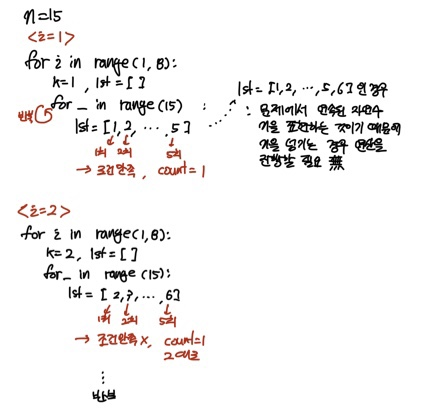